# __BAX-452 Assignment 1: Linear Regression and FDR__

## __1. Data Exploration and Visualization__

#### First, I will begin with data exploration and provide a basic summary of the data structure.

In [55]:
import pandas as pd

In [56]:
# load the dataset
data = pd.read_csv("/Users/yumi/ucdavis/Winter Quarter/BAX-452/HW/fundamentals.csv")

# display the first few rows of the dataset
data.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [57]:
# generate a basic summary of the data structure
summary = {"Number of Rows": data.shape[0],
           "Number of Columns": data.shape[1],
           "Number of Companies": data['Ticker Symbol'].nunique(),
           "Date Range": (data['Period Ending'].min(), data['Period Ending'].max())}
summary

{'Number of Rows': 1781,
 'Number of Columns': 79,
 'Number of Companies': 448,
 'Date Range': ('2003-06-30', '2017-01-01')}

#### To further explore the data, I will explore several types of analyses and visualizations, like Trend Analysis or Comparison Analysis among companies.

#### 1. Trend Analysis Over Years: Analyze how metrics like 'Total Revenue', 'Total Assets', and 'Earnings Per Share' have evolved over the years for specific companies (e.g. AAPL)

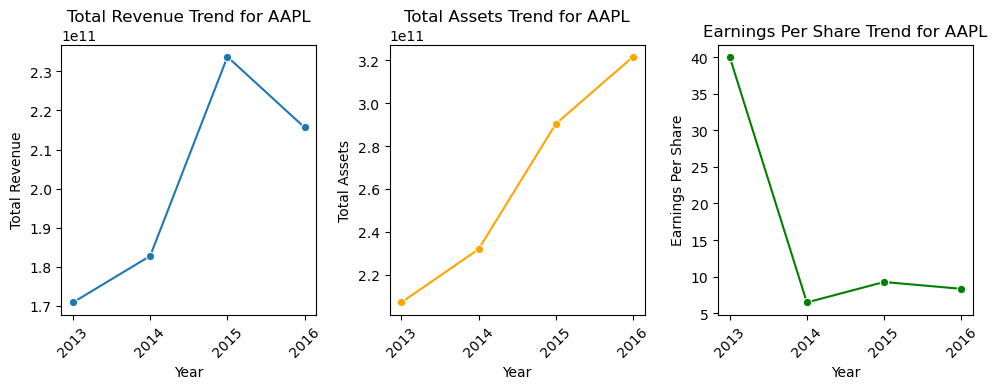

In [58]:
import seaborn as sns

# Filter data for AAPL
data_aapl = data[data['Ticker Symbol'] == 'AAPL']

# Sorting values based on 'For Year'
data_aapl = data_aapl.sort_values(by='For Year')

# Plotting the trend of 'Total Revenue', 'Total Assets', and 'Earnings Per Share' for AAPL
plt.figure(figsize=(10, 4))

# Total Revenue
plt.subplot(1, 3, 1)
sns.lineplot(x='For Year', y='Total Revenue', data=data_aapl, marker='o')
plt.title('Total Revenue Trend for AAPL')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

# Total Assets
plt.subplot(1, 3, 2)
sns.lineplot(x='For Year', y='Total Assets', data=data_aapl, marker='o', color='orange')
plt.title('Total Assets Trend for AAPL')
plt.xlabel('Year')
plt.ylabel('Total Assets')
plt.xticks(rotation=45)

# Earnings Per Share
plt.subplot(1, 3, 3)
sns.lineplot(x='For Year', y='Earnings Per Share', data=data_aapl, marker='o', color='green')
plt.title('Earnings Per Share Trend for AAPL')
plt.xlabel('Year')
plt.ylabel('Earnings Per Share')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### The line plots above show the trends over the years for 'AAPL' (Apple Inc.) in terms of 'Total Revenue', 'Total Assets', and 'Earnings Per Share'. There's a general upward trend in total revenue and total assets, indicating growth in revenue and assets over the years. 

#### 2. Correlation Heatmap: Understand how different financial metrics are correlated with each other.

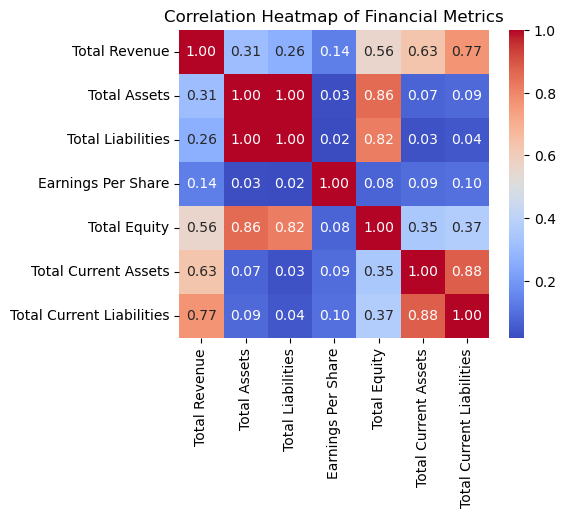

In [59]:
# Selecting a subset of numerical columns for correlation analysis
numerical_cols = ['Total Revenue', 'Total Assets', 'Total Liabilities', 'Earnings Per Share', 'Total Equity', 'Total Current Assets', 'Total Current Liabilities']
correlation_data = data[numerical_cols].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()

#### The correlation heatmap above visualizes the relationships between various financial metrics.
#### There's a strong positive correlation (0.76) between Total Revenue and Total Assets, indicating that companies with higher revenue tend to have higher total assets.
#### A very strong positive correlation (0.95) is observed between Total Assets and Total Liabilities, indicating that as companies' assets grow, their liabilities tend to grow proportionally. This could be due to leveraging assets to finance growth.

#### And then I performed comparison analysis for some of the companies, and created several bar charts accordingly.

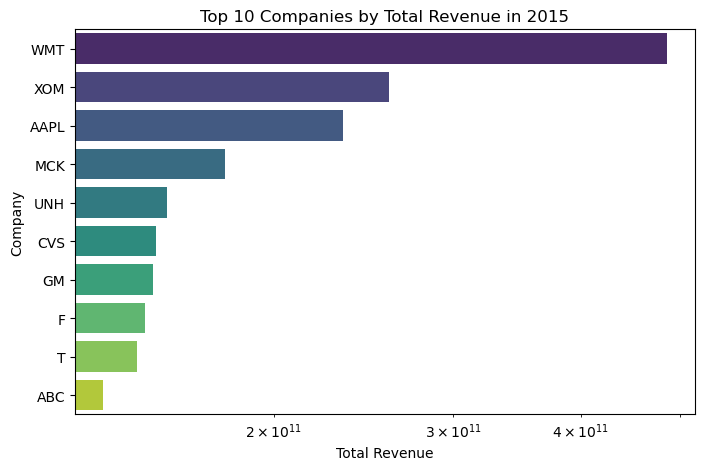

In [60]:
# make comparisons between the top 10 companies in 2015 in terms of the Total Revenue

# Filter the data for the year 2015
data_2015 = data[data['For Year'] == 2015]

# Sort the companies based on 'Total Revenue' and select the top 10
top_companies_2015 = data_2015.sort_values(by='Total Revenue', ascending=False).head(10)

# Plotting the top 10 companies based on Total Revenue in 2015
plt.figure(figsize=(8, 5))
sns.barplot(x='Total Revenue', y='Ticker Symbol', data=top_companies_2015, palette='viridis')
plt.title('Top 10 Companies by Total Revenue in 2015')
plt.xlabel('Total Revenue')
plt.ylabel('Company')
plt.xscale('log')  # Log scale for better readability
plt.show()

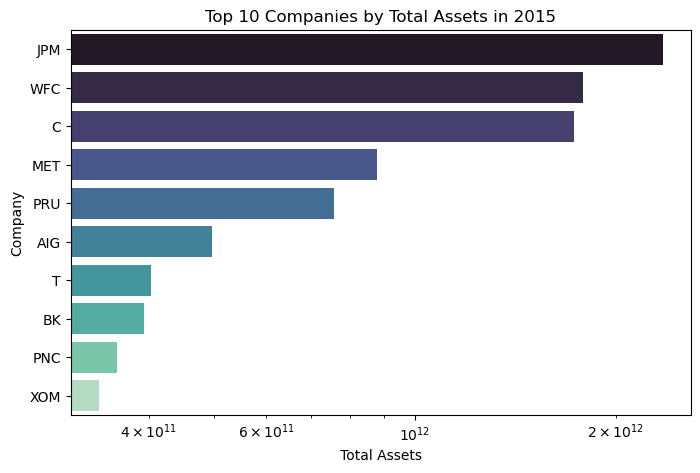

In [61]:
# make comparisons between the top 10 companies in 2015 in terms of the Total Assets

# Sort the companies based on 'Total Assets' and select the top 10
top_companies_assets_2015 = data_2015.sort_values(by='Total Assets', ascending=False).head(10)

# Plotting the top 10 companies based on Total Assets in 2015
plt.figure(figsize=(8, 5))
sns.barplot(x='Total Assets', y='Ticker Symbol', data=top_companies_assets_2015, palette='mako')
plt.title('Top 10 Companies by Total Assets in 2015')
plt.xlabel('Total Assets')
plt.ylabel('Company')
plt.xscale('log')  # Log scale for better readability
plt.show()

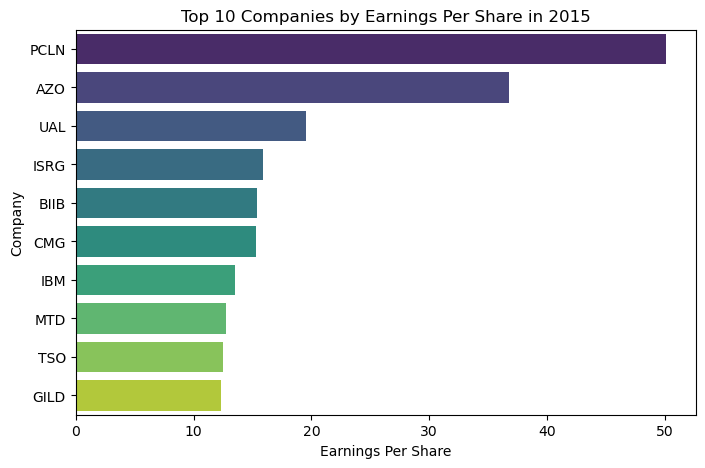

In [62]:
# top 10 companies with the highest 'Earnings Per Share' in 2015

# Filter the data for the year 2015
data_2015 = data[data['For Year'] == 2015]

# Sort the companies based on 'Earnings Per Share' and select the top 10
top_eps_companies_2015 = data_2015.sort_values(by='Earnings Per Share', ascending=False).head(10)

# Plotting the top 10 companies based on Earnings Per Share in 2015
plt.figure(figsize=(8, 5))
sns.barplot(x='Earnings Per Share', y='Ticker Symbol', data=top_eps_companies_2015, palette='viridis')
plt.title('Top 10 Companies by Earnings Per Share in 2015')
plt.xlabel('Earnings Per Share')
plt.ylabel('Company')
plt.show()


---

## __2. Linear Regression Model Development__

#### Before building the model, we should handling the missing values. Therefore, I did the data cleaning first.

In [63]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

Cash Ratio                      299
Current Ratio                   299
Quick Ratio                     299
For Year                        173
Earnings Per Share              219
Estimated Shares Outstanding    219
dtype: int64

In [64]:
import statsmodels.api as sm
import numpy as np

In [108]:
# Remove 'Ticker Symbol' and 'Period Ending' variables (object data)
data_cleaned = data.drop(columns=['Ticker Symbol', 'Period Ending', 'Unnamed: 0'])

# Remove rows with NA values
data_cleaned = data_cleaned.dropna()

# Separate the target variable and predictor variables
X = data_cleaned.drop(columns=['Estimated Shares Outstanding'])
X = sm.add_constant(X)
Y = data_cleaned['Estimated Shares Outstanding']

In [109]:
model1 = sm.OLS(Y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.854
Model:                                      OLS   Adj. R-squared:                  0.846
Method:                           Least Squares   F-statistic:                     98.40
Date:                          Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                  22:27:12   Log-Likelihood:                -27507.
No. Observations:                          1299   AIC:                         5.516e+04
Df Residuals:                              1225   BIC:                         5.554e+04
Df Model:                                    73                                         
Covariance Type:                      nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                7.312e+08      1e+09      0.729      0.466   -1.24e+09     2.7e+09
Accounts Payable                                     -183.9454    238.959     -0.770      0.442    -652.760     284.869
Accounts Receivable                                    -0.0722      0.057     -1.274      0.203      -0.183       0.039
Add'l income/expense items                              0.0361      0.057      0.635      0.525      -0.075       0.148
After Tax ROE                                       -6.663e+05      5e+05     -1.332      0.183   -1.65e+06    3.15e+05
Capital Expenditures                                    0.9122      2.396      0.381      0.704      -3.789       5.614
Capital Surplus                                         0.0149      0.009      1.631      0.103      -0.003       0.033
Cash Ratio                                           6.866e+05   3.83e+05      1.793      0.073   -6.45e+04    1.44e+06
Cash and Cash Equivalents                              -1.2388      0.617     -2.008      0.045      -2.449      -0.029
Changes in Inventories                                 -0.0876      0.060     -1.456      0.146      -0.206       0.030
Common Stocks                                          -0.0014      0.010     -0.143      0.886      -0.020       0.018
Cost of Revenue                                         1.6205      0.302      5.359      0.000       1.027       2.214
Current Ratio                                       -2.044e+05   2.94e+05     -0.695      0.487   -7.82e+05    3.73e+05
Deferred Asset Charges                                 -0.0585      0.989     -0.059      0.953      -1.999       1.882
Deferred Liability Charges                              0.0094      0.099      0.095      0.925      -0.185       0.204
Depreciation                                           -0.0843      0.057     -1.488      0.137      -0.196       0.027
Earnings Before Interest and Tax                       22.5389     39.533      0.570      0.569     -55.022     100.100
Earnings Before Tax                                   -22.8602     39.533     -0.578      0.563    -100.420      54.699
Effect of Exchange Rate                                -0.0233      0.166     -0.141      0.888      -0.348       0.302
Equity Earnings/Loss Unconsolidated Subsidiary          0.1119      0.082      1.371      0.171      -0.048       0.272
Fixed Assets                                           -0.0572      0.989     -0.058      0.954      -1.998       1.883
Goodwill                                               -0.0642      0.989     -0.065      0.9

### __Interpretations: __
#### __1. Model Fit Indicators__
####     R-squared: 0.854 indicates that approximately 85.4% of the variability in the dependent variable is explained by the model. which is relatively high.
####     F-statistic: 98.40 indicates a good fit.

#### __2. Coefficients__
####     Several variables have p-values less than 0.05, indicating that they are statistically significant at the 5% level. For example: Cost of Revenue, Gross Profit, Net Borrowings...

#### __3. Condition Number__
####     A high condition number indicates potential multicollinearity problems. Here, the condition number is very high (1.17e+16), suggesting that multicollinearity may be inflating the variances of the coefficient estimates.

#### In summary, while the model explains a significant portion of the variance in the dependent variable, and several predictors are statistically significant, the diagnostics suggest potential issues with the normality of residuals and multicollinearity. 

---

## __3. Multicollinearity in Linear Regression__

####  Multicollinearity in linear regression occurs when explanatory variables are highly correlated, making it challenging to discern their individual impacts on the response variable. It doesn't invalidate the model but leads to indeterminate coefficients with inflated variances and standard errors, undermining their precision and reliability. While some degree of multicollinearity is inevitable, significant levels can result in unstable coefficients, wide confidence intervals, misleading statistical significance tests, and an inflated R-squared value that suggests a misleadingly high explanatory power. In severe cases, with perfect multicollinearity, coefficients become completely indeterminate, rendering the model incapable of providing meaningful insights into the effects of individual predictors.

---

## __4. P-Value Analysis and Histogram__

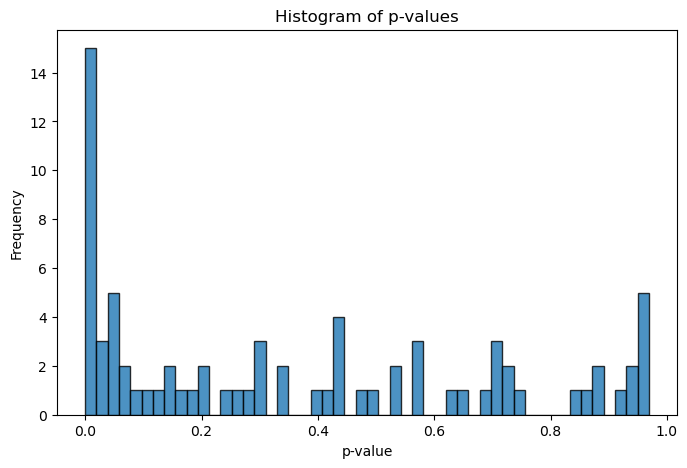

0.47729295885532286

In [111]:
import matplotlib.pyplot as plt

# Extracting p-values from the model summary
p_values = model1.pvalues

# Creating the histogram of the p-values
plt.figure(figsize=(8, 5))
plt.hist(p_values, bins=50, edgecolor='black', alpha = 0.8)
plt.title('Histogram of p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

# Checking for skewness in the p-values
skewness = p_values.skew()
skewness

#### Interpretations: The distribution of p-values have a moderate right skew, indicating that there are more smaller p-values compared to larger ones. The skewness value of 0.4773 also indicates that. There are also a number of p-values clustered towards the higher end, near 1.0. This indicates that some predictors are not statistically significant and maybe we can drop them.

---

## __5. False Discovery Rate Control with BH Procedure__

In [85]:
# Build the FDR Model
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")
  
  # Optional plot
  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return alpha

Alpha: 0.01931907504015073


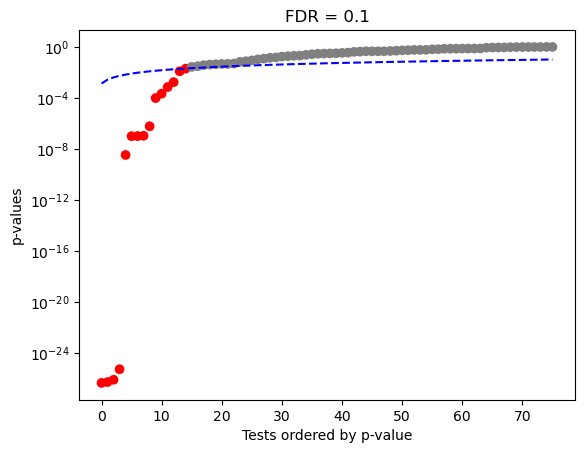

In [86]:
# Test the fdr function at the level of 0.1
alpha_threshold = fdr(p_values, 0.1, plotit=True)

In [87]:
# Compare p-values with alpha_threshold and count the significant variables
count = (p_values < alpha_threshold).sum().sum()
count

14

#### When q is set to 0.1, the estimated "true" discoveries are 14.

---

## __6. Sensitivity Analysis of FDR Control__

Alpha: 0.048268679956140884


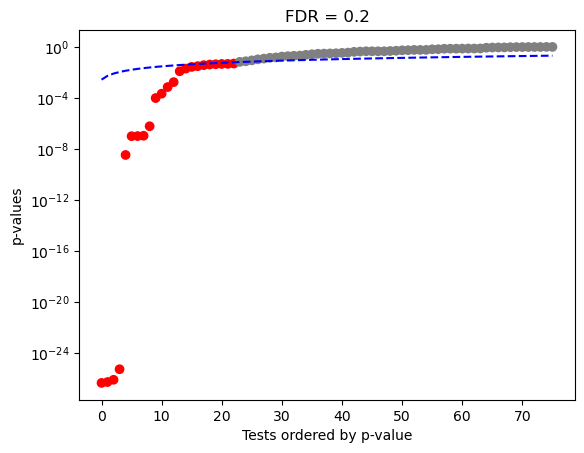

In [98]:
# Test the fdr function at the level of 0.2
alpha_threshold = fdr(p_values, 0.2, plotit=True)

In [99]:
# Compare p-values with alpha_threshold and count the significant variables
count = (p_values < alpha_threshold).sum().sum()
count

22

Alpha: 0.0016866312066473493


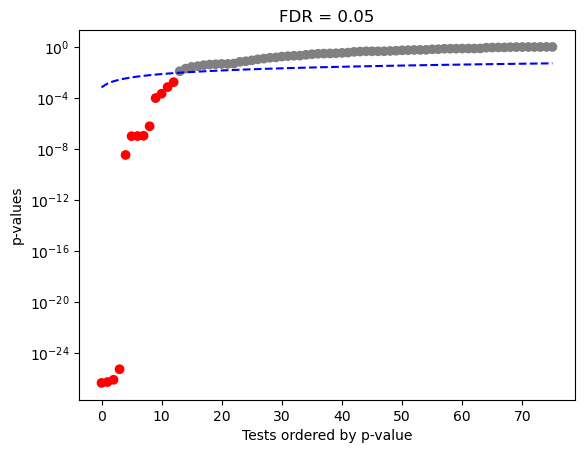

In [100]:
# Test the fdr function at the level of 0.05
alpha_threshold = fdr(p_values, 0.05, plotit=True)

In [101]:
# Compare p-values with alpha_threshold and count the significant variables
count = (p_values < alpha_threshold).sum().sum()
count

12

Alpha: 0.0016866312066473493


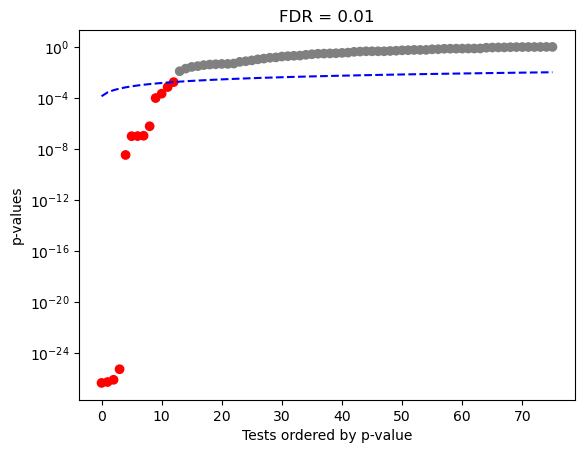

In [102]:
# Test the fdr function at the level of 0.01
alpha_threshold = fdr(p_values, 0.01, plotit=True)

In [103]:
# Compare p-values with alpha_threshold and count the significant variables
count = (p_values < alpha_threshold).sum().sum()
count

12

#### When we apply the BH procedure at the level of q = 0.2, the result of the "true" discoveries changed to 22 (from 14).
#### When we apply the BH procedure at the level of q = 0.05, the result of the "true" discoveries changed to 12 (from 14).
#### When we apply the BH procedure at the level of q = 0.01, the result of the "true" discoveries are still 12.
#### This result indicating that there are 12 variables that are truly robust, cause they remain significant even when we reduce the q values level to 0.01. While for those variables that are significant at q = 0.2 but insignificant at q = 0.01, they are less robust, their significance is more likely to be due to chance.

---

## __7. Exploring Interaction Terms__

In [112]:
# Select the first 25 variables
X = data_cleaned.iloc[:, :25]

In [113]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction terms (up to quadratic terms)
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_interaction = poly.fit_transform(X)

# Convert it to a DataFrame for statsmodels
X_interaction_df = pd.DataFrame(X_interaction, columns=poly.get_feature_names_out(X.columns))

# Add a constant to the predictor variable set for statsmodels
X_interaction_df = sm.add_constant(X_interaction_df)
X_interaction_df

#resetting the index to make sure x and y match 
Y = Y.reset_index(drop=True)
X = X.reset_index(drop=True)

# # Fit the model with interaction terms
model2 = sm.OLS(Y, X_interaction_df).fit()

# # Show the summary of the model with interactions
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.944
Model:                                      OLS   Adj. R-squared:                  0.926
Method:                           Least Squares   F-statistic:                     52.58
Date:                          Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                  22:27:41   Log-Likelihood:                -26886.
No. Observations:                          1299   AIC:                         5.440e+04
Df Residuals:                               983   BIC:                         5.604e+04
Df Model:                                   315                                         
Covariance Type:                      nonrobust                                         
===================================================================================================================================================
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                               0.0004      0.000      1.650      0.099   -6.76e-05       0.001
Accounts Payable                                                                   -0.0733      0.046     -1.595      0.111      -0.164       0.017
Accounts Receivable                                                                -0.4975      0.284     -1.749      0.081      -1.056       0.061
Add'l income/expense items                                                          0.0843      0.277      0.304      0.761      -0.459       0.628
After Tax ROE                                                                       0.0009      0.001      1.281      0.201      -0.000       0.002
Capital Expenditures                                                                0.0208      0.097      0.215      0.830      -0.169       0.211
Capital Surplus                                                                     0.0559      0.021      2.666      0.008       0.015       0.097
Cash Ratio                                                                         -0.0002      0.000     -0.609      0.543      -0.001       0.000
Cash and Cash Equivalents                                                          -0.0266      0.059     -0.449      0.654      -0.143       0.090
Changes in Inventories                                                             -0.1814      0.500     -0.363      0.717      -1.163       0.800
Common Stocks                                                                      -0.0118      0.049     -0.239      0.811      -0.109       0.085
Cost of Revenue                                                                    -0.0082      0.009     -0.901      0.368      -0.026       0.010
Current Ratio                                                                      -0.0003      0.000     -1.792      0.073      -0.001    3.17e-05
Deferred Asset Charges                                                              0.2465      0.121      2.032      0.042       0.008       0.485
Deferred Liability Charges                                                         -0.0333      0.059     -0.568      0.570      -0.148       0.082
Depreciation                                                                        0.0553      0.152      0.365      0.715      -0.242       0.353
Earnings Before Interest and Tax                                                    0.3863      0.287      1.348      0.178      -0.176       0.949
Earnings Befo

### __Interpretations: __
#### __1. Model Fit Indicators__
####     R-squared: 0.944 indicates that approximately 94.4% of the variability in the dependent variable is explained by the model. which is relatively high.
####     F-statistic: 52.58 indicates a good fit.

#### __2. Coefficients__
####     Several variables have p-values less than 0.05, indicating that they are statistically significant at the 5% level. 

#### __3. Condition Number__
####     A high condition number indicates potential multicollinearity problems. Here, the condition number is even higher (3.07e+16), suggesting that multicollinearity may be inflating the variances of the coefficient estimates.

#### In summary, while the model explains a significant portion of the variance in the dependent variable, and several predictors are statistically significant, the diagnostics suggest that there are strong multicollinearity or other numerical problems.

#### __Why interation terms might be important in the context of predicting Estimated Shares Outstanding using fundamental financial metrics?__

#### Maybe because financial metrics may not impact the Estimated Shares Outstanding independently. For instance, the effect of revenue on shares outstanding could depend on the level of debts a company has. Or perhaps, two financial metrics might have a synergistic effect on the shares outstanding that is not captured when considering the metrics separately. For example, both asset growth and profitability might individually affect shares outstanding, but their combined effect might be greater (or less) than the sum of the individual effects.

---

## __8. Model Evaluation with Interaction Terms__

#### __Comparison:__
#### The model with interaction terms has an R² of 0.944, while the model without interaction terms has an R² of 0.854. This suggests that the model with interaction terms explains more variance in the dependent variable which means have a better fit.
#### The F-statistic is 52.58 for the model with interaction terms and 98.40 for the model without. Although the F-statistic is higher for the model without interaction terms, it does not directly indicate a better fit because it also depends on the degrees of freedom of the model and the sum of squares explained by the model.
#### __Significant changes:__
#### Jarque-Bera (JB) decrease significantly from 238833.420 to 19581.713, indicating that an improvement in the normality assumption underlying OLS regression, suggesting a better fit of the model as well.


---

## __9. FDR Analysis with Interaction Terms__

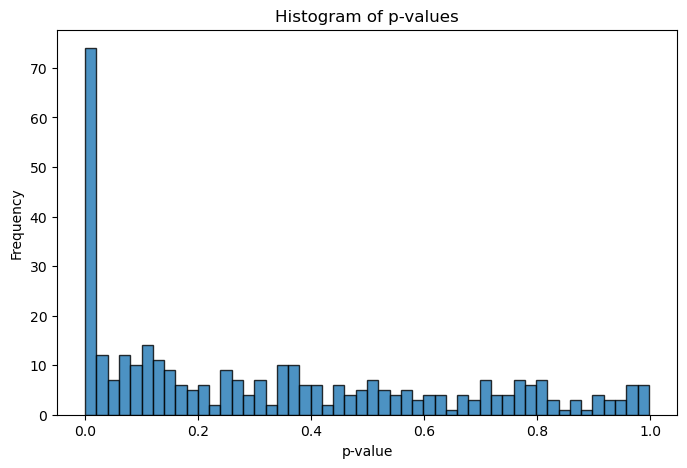

0.622261709442905

In [114]:
# Extracting p-values from the model summary
p_values = model2.pvalues

# Creating the histogram of the p-values
plt.figure(figsize=(8, 5))
plt.hist(p_values, bins=50, edgecolor='black',alpha = 0.8)
plt.title('Histogram of p-values')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show()

# Checking for skewness in the p-values
skewness = p_values.skew()
skewness

#### a.  The distribution of p-values for the new model is right skew as well, indicating that there are more smaller p-values compared to larger ones. The skewness value of 0.6223 also indicates that (And it's more right skew than the original model). Besides, the biggest difference is that the porportion of p-values clustered near 1.0 decrease significantly. This indicates that there are less useless predictors compared to the formal model.


Alpha: 0.01971039101763734


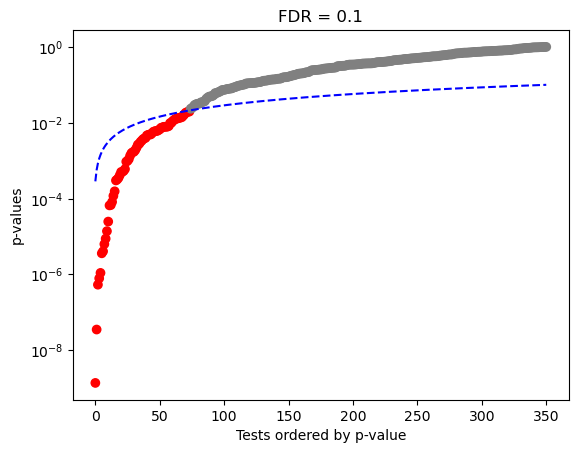

In [115]:
# Test the fdr function at the level of 0.1
alpha_threshold = fdr(p_values, 0.1, plotit=True)

In [116]:
# Compare p-values with alpha_threshold and count the significant variables
count = (p_values < alpha_threshold).sum().sum()
count

73

#### b. At the level of q = 0.1, 73 significant predictors are identified, including both main effects and interaction effects.

Alpha: 0.00819628568212649


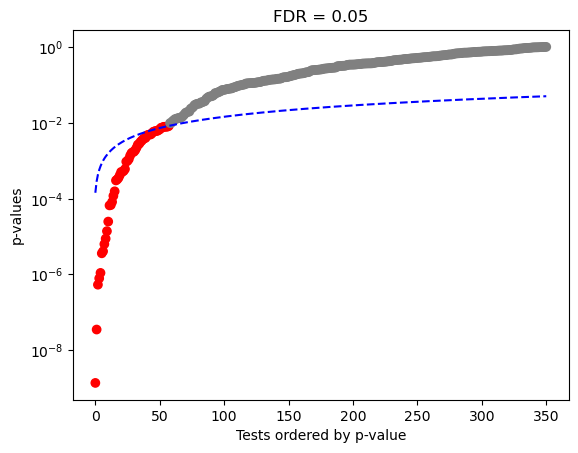

In [117]:
# Test the fdr function at the level of 0.05
alpha_threshold = fdr(p_values, 0.05, plotit=True)

In [118]:
# Compare p-values with alpha_threshold and count the significant variables
count = (p_values < alpha_threshold).sum().sum()
count

57

Alpha: 0.0005997631744757473


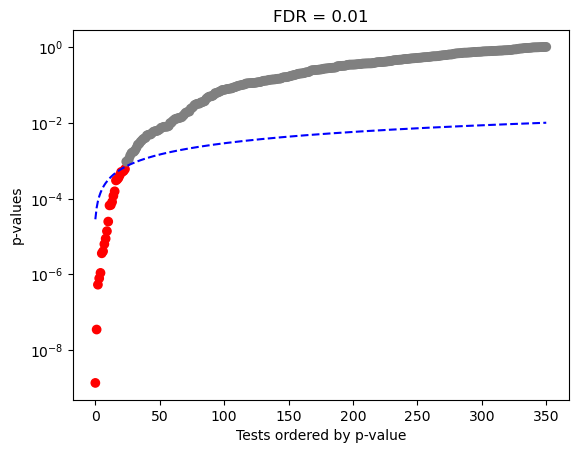

In [119]:
# Test the fdr function at the level of 0.01
alpha_threshold = fdr(p_values, 0.01, plotit=True)

In [120]:
# Compare p-values with alpha_threshold and count the significant variables
count = (p_values < alpha_threshold).sum().sum()
count

23

#### c. __Comparison:__
#### At the level of q = 0.1,14 significant predictors are identified in the original model while 73 significant predictors are identified in the new model. The number of discoveries increased significantly; however, that increase might due to the reason that we included more variables in the new model.
#### As for the changes in the control of the FDR, significant predictors drop significantly (from 73 to 23) as we reduced the q value (from 0.1 to 0.01), indicating that most predictors are not that robust.